In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
!pip install ibm_watson_machine_learning

In [25]:
import io
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='x221UMId_ywuFpzbpj4uOnucvFVCYtXQntLlsFjtnd9S',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'crudeoilpricepredictionmodeldeplo-donotdelete-pr-s1tcn7x0mqvxms'
object_key = 'Crude Oil Prices Daily.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

ds = pd.read_excel(body.read())
ds.head()
ds[:10]

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [26]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"XprsR-HkAAhaiuK8Eqx6-sp-4cf__EwrLOEouzvummKg"
}
client = APIClient(url_credentials)

In [27]:
ds.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [28]:
ds.dropna(axis=0,inplace=True)

In [29]:
ds.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [30]:
data=ds.reset_index()['Closing Value']
data

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [32]:
data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

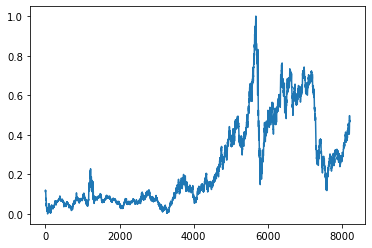

In [33]:
plt.plot(data)

In [34]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [35]:
training_size,test_size

(5340, 2876)

In [36]:
train_data.shape

(5340, 1)

In [37]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [38]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [39]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [40]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [41]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [42]:
x_test

array([[0.38005331, 0.36872501, 0.37324152, ..., 0.3537687 , 0.35465719,
        0.3499926 ],
       [0.36872501, 0.37324152, 0.38205242, ..., 0.35465719, 0.3499926 ,
        0.3465867 ],
       [0.37324152, 0.38205242, 0.38042352, ..., 0.3499926 , 0.3465867 ,
        0.34355101],
       ...,
       [0.40604176, 0.41218718, 0.41041019, ..., 0.46794017, 0.47297497,
        0.47119799],
       [0.41218718, 0.41041019, 0.43513994, ..., 0.47297497, 0.47119799,
        0.47341922],
       [0.41041019, 0.43513994, 0.4417296 , ..., 0.47119799, 0.47341922,
        0.46497853]])

In [43]:
x_train1=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [44]:
x_train1

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])

MODEL BUILDING :

IMPORTING THE MODEL BUILDING LIBRARIES

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

INITIALIZING THE MODEL

In [46]:
model = Sequential()

ADDING LSTM LAYERS

In [47]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

ADDING OUTPUT LAYERS

In [48]:
model.add(Dense (1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


CONFIGURE THE LEARNING PROCESS

In [49]:
model.compile(loss='mean_squared_error',optimizer='adam')

TRAIN THE MODEL

In [50]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 5s 31ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 2/50
84/84 [==============================] - 2s 21ms/step - loss: 1.3244e-04 - val_loss: 8.8761e-04
Epoch 3/50
84/84 [==============================] - 1s 16ms/step - loss: 1.2878e-04 - val_loss: 9.8458e-04
Epoch 4/50
84/84 [==============================] - 1s 16ms/step - loss: 1.2561e-04 - val_loss: 8.6472e-04
Epoch 5/50
84/84 [==============================] - 1s 15ms/step - loss: 1.2501e-04 - val_loss: 8.7949e-04
Epoch 6/50
84/84 [==============================] - 1s 15ms/step - loss: 1.3064e-04 - val_loss: 0.0013
Epoch 7/50
84/84 [==============================] - 1s 16ms/step - loss: 1.2117e-04 - val_loss: 7.6022e-04
Epoch 8/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2224e-04 - val_loss: 0.0011
Epoch 9/50
84/84 [==============================] - 2s 20ms/step - loss: 1.1854e-04 - val_loss: 8.6479e-04
Epoch 10/50
84/84 [==============================] - 

MODEL EVALUATION

In [51]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
## Calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

SAVE THE MODEL

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save("crude_oil.h5")

In [54]:
ls

crude_oil.h5  crude-oil.tgz


In [55]:
!tar -zcvf crude-oil-predict-model.tgz crude_oil.h5

crude_oil.h5


TEST THE MODEL

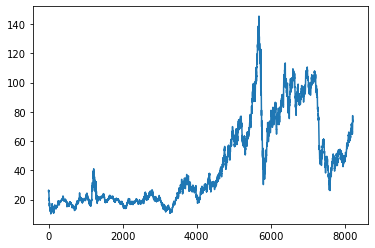

In [56]:
## Plotting
look_back=10
trainpredictPlot = np.empty_like(data)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictplot = np.empty_like(data)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.show()

In [57]:
len(test_data)

2876

In [58]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [59]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [60]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [61]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
#print(temp_input)
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] #print(temp_input)
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.47713897]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47713897]
1 day output [[0.48322928]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47713897 0.48322928]
2 day output [[0.48920894]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47713897 0.48322928 0.48920894]
3 day output [[0.4944508]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47713897 0.48322928 0.48920894 0.49445081]
4 day output [[0.4990595]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47713897
 0.48322928 0.48920894 0.49445081 0.4990595 ]
5 day output [[0.5029365]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47713897 0.48322928
 0.48920894 0.49445081 0.4990595  0.50293648]
6 day output [[0.506247]]
7 day input [0.46497853 0.47038353 0.47149415 0.47713897 0.48322928 0.4

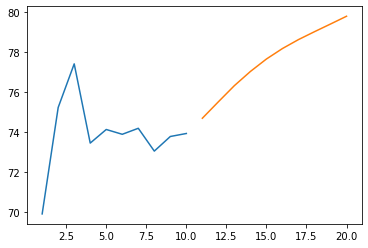

In [62]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(data)
plt.plot(day_new, scaler.inverse_transform(data[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

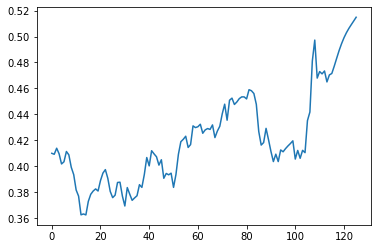

In [63]:
df3=data.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

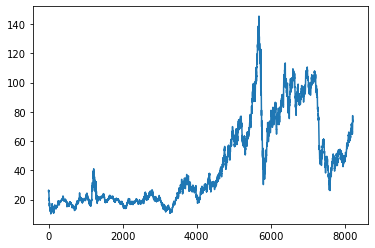

In [64]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(scaler.inverse_transform(data))

In [65]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"XprsR-HkAAhaiuK8Eqx6-sp-4cf__EwrLOEouzvummKg"
}
client = APIClient(url_credentials)

In [66]:
def guid_from_space_name(client, models):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == models)['metadata']['id'])

In [67]:
space_uid = guid_from_space_name(client, 'models')
print("space UID =" + space_uid)

space UID =ad7a1ed1-6292-415f-a365-c7456e099b46


In [68]:
client.set.default_space(space_uid)

'SUCCESS'

In [69]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [85]:
software_spec_id =  client.software_specifications.get_id_by_name('tensorflow_rt22.1-py3.9)
(software_spec_id)

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [71]:
model = Sequential()

In [72]:
ls

crude_oil.h5  crude-oil-predict-model.tgz  crude-oil.tgz


In [73]:
!tar -zcvf crude-oil.tgz crude_oil.h5

crude_oil.h5


In [82]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [83]:
ls

crude_oil.h5  crude-oil-predict-model.tgz  crude-oil.tgz


In [90]:
model_details = client.repository.store_model(model= 'crude-oil.tgz' ,meta_props={
client.repository.ModelMetaNames.NAME:"models",
client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_id }
                                          )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [91]:
model_id

'0674e261-521c-41f9-a71d-9876178b87a9'

In [92]:
client.repository.download(model_id,'crude_oil.tar.gb')

Successfully saved model content to file: 'crude_oil.tar.gb'


'/home/wsuser/work/crude_oil.tar.gb'

In [93]:
pwd

'/home/wsuser/work'